# Video Game Sales  12/4/2019
<b>This data set contains sales data from more than 55,792 games and some game canceled</b><br><br>
<b>I corrected 108 games that were dated 1973 and were wrong and I copied the one in the Global_Sales column and put it in the Total_Shipped column .</b><br>
It was generated by a scrape of <b>vgchartz.com</b>.

Fields include
<ol>
<li>Rank - Ranking of overall sales
<li>Name - The games name
<li>Genre - Genre of the game
<li>ESRB_Rating - The Entertainment Software Rating Board
<li>Platform - Platform of the games release (i.e. PC,PS4,NS etc.)
<li>Publisher - Publisher of the game
<li>NA_Sales - Sales in North America (in millions)
<li>EU_Sales - Sales in Europe (in millions)
<li>JP_Sales - Sales in Japan (in millions)
<li>Other_Sales - Sales in the rest of the world (in millions)
<il>Global_Sales - Total worldwide sales.</il>
<li>Year - Year of the game's release
</ol>

## This project will follow CRISP-DM methdology which provides a structed process to approach data science problems, it's constructed of 6 steps:
<ol>
<li>Business understanding
<li>Data understanding
<li>Data preparation
<li>Modeling
<li>Evaluation
<li>Deployment
</ol>

## 1-Business Understanding and Analysis Questions:
<ol>
<li>What is the best-selling version of the game?
<li>What types of games developed by the best-selling company?
<li>What year was the best-selling and most developed games?
</ol>

## 2-Data Undertstanding and Analysis: 
In this section we will import libraries, packages and functions necessry for this project, we will be using: Pandas, NumPy, Sklearn, Plotly, and matplotlib . After that we will load our datasets and start looking into the data:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def subplotsOne (games, yearone):
    platform_title = games.Platform.value_counts()
    plt.subplots(figsize=(20,20))
    colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
    ax = sns.barplot(x=platform_title , y=platform_title .index, palette='bright')
    ax.set_title('Most Number Titles per Platform {}'.format(yearone), color='red', alpha=1, size=25)
    ax.set_xlabel('Total Title', color='green', alpha=1, size=30)
    ax.set_ylabel('Platform', color='green', alpha=1, size=30)

In [3]:
def subplotsTwo (games, games_by_genre, yearone):
    plt.subplots(figsize=(30,15))
    ax = sns.pointplot(x=games_by_genre.index, y=games_by_genre.Genre)
    ax.set_title('Total Number of Games by Genre {}'.format(yearone), color='red', size=30, alpha=1)
    ax.set_xlabel('Genre', color='green', size=30, alpha=1)
    ax.set_ylabel('Total Number of Games', color='green', size=30, alpha=1)

In [4]:
def subplotsThree (games, yearone):
    global_sales_by_genre = games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
    plt.subplots(figsize=(25,15))
    ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales, palette='bright')
    ax.set_title('Global Sales of Games by Genre (1977-2020)', color='red', size=30, alpha=1)
    ax.set_xlabel('Genre', color='green', size=30, alpha=1)
    ax.set_ylabel('Global Sales', color='green', size=30, alpha=1)

In [5]:
def subplotsFour (games, yearone):
    global_sales_by_genre = games.groupby('Genre').agg({'Total_Shipped':np.sum}).sort_values('Total_Shipped')
    plt.subplots(figsize=(25,15))
    ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Total_Shipped, palette='bright', alpha=1)
    ax.set_title('Total Shipped of Games by Genre {}'.format(yearone), color='red', size=30, alpha=1)
    ax.set_xlabel('Genre', color='green', size=30, alpha=1)
    ax.set_ylabel('Total Shipped', color='green', size=30, alpha=1)

In [6]:
def subplotsFive (games, yearone):
    global_sales_publisher = games.pivot_table(index=['Publisher'], values=['Global_Sales','NA_Sales','PAL_Sales','JP_Sales'], 
                                               aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)
    global_sales_publisher = global_sales_publisher[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']]
    ax = global_sales_publisher.iloc[0:15,:].plot(kind='bar', stacked=True, grid=False,figsize=(20,10))
    ax.set_title('Top 15 Publishers by Global Sales {}'.format(yearone), size=30, color='red', alpha=1)
    ax.set_xlabel('Publisher', size=30, color='green', alpha=1)
    ax.set_ylabel('Sales', size=30, color='green', alpha=1)

In [7]:
def subplotsSix (games, yearone):
    Total_Shipped_publisher = games.pivot_table(index=['Publisher'], values=['Total_Shipped'], 
                                               aggfunc=np.sum).sort_values(['Total_Shipped'], ascending=False)
    Total_Shipped_publisher = Total_Shipped_publisher[['Total_Shipped']]
    ax = Total_Shipped_publisher.iloc[0:15,:].plot(kind='bar', stacked=True, grid=False,figsize=(20,10))
    ax.set_title('Top 15 Publishers by Total Shipped {}'.format(yearone), size=30, color='Red', alpha=1)
    ax.set_xlabel('Publisher', size=30, color='green', alpha=1)
    ax.set_ylabel('Sales', size=30, color='green', alpha=1)

### Data loading and preprocessing:
To start the analysis we will load the data which consists of file (Modified file Video Game Sales (vgsales-12-4-2019))

In [8]:
games = pd.read_excel('vgsales_F.xlsx')
print(games.shape)
games.head()

(55792, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 18 columns):
Rank              55792 non-null int64
Name              55792 non-null object
basename          55792 non-null object
Genre             55792 non-null object
ESRB_Rating       23623 non-null object
Platform          55792 non-null object
Publisher         55792 non-null object
Developer         55775 non-null object
VGChartz_Score    0 non-null float64
Critic_Score      6536 non-null float64
User_Score        335 non-null float64
Total_Shipped     21243 non-null float64
Global_Sales      19415 non-null float64
NA_Sales          12964 non-null float64
PAL_Sales         13189 non-null float64
JP_Sales          7043 non-null float64
Other_Sales       15522 non-null float64
Year              54799 non-null float64
dtypes: float64(10), int64(1), object(7)
memory usage: 7.7+ MB


In [10]:
games.isnull().sum()


Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     34549
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                993
dtype: int64

In [11]:
games.dropna(axis='rows', subset=['Year'], inplace=True)
games.Year = games.Year.astype(np.int64)


games.dropna(axis='rows', subset=['Year'], inplace=True)
## To Deletes the year row that has NaN

In [12]:
games.isnull().sum()


Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       31280
Platform              0
Publisher             0
Developer            14
VGChartz_Score    54799
Critic_Score      48267
User_Score        54471
Total_Shipped     33594
Global_Sales      35422
NA_Sales          41841
PAL_Sales         41634
JP_Sales          47764
Other_Sales       39303
Year                  0
dtype: int64

In [13]:
print(games.shape)


(54799, 18)


In [14]:
multiple_platform_title = games.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None})
multiple_platform_title = multiple_platform_title
multiple_platform_title.Name = multiple_platform_title.Name
multiple_platform_title.columns = ['Platform_count']
multiple_platform_title.sort_values(by='Platform_count', ascending=False)

,Platform_count
Name,
Plants vs. Zombies,20.0
Monopoly,15.0
Double Dragon,14.0
Elite,12.0
Space Invaders,12.0
...,...
vib-ribbon,NaN
xFart,NaN
yOm,NaN


## 3-Data preparation:
all data NaN drop only when ues it 

In [15]:
multiple_platform_title = games.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None})
multiple_platform_title = multiple_platform_title.dropna()
multiple_platform_title.Name = multiple_platform_title.Name.astype(np.int64)
multiple_platform_title.columns = ['Platform_count']
multiple_platform_title.sort_values(by='Platform_count', ascending=False)

,Platform_count
Name,
Plants vs. Zombies,20
Monopoly,15
Double Dragon,14
Elite,12
Space Invaders,12
...,...
Kentucky Route Zero,2
Kenka Bancho: Badass Rumble,2
Ken to Mahou to Gakuen Mono. Final: Shinnyusei wa Ohimesama,2


###  games.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None})
get all name game 

### multiple_platform_title.dropna()
delete all NaN

##  4-Data modeling

In [16]:
games_by_genre = games.groupby('Genre').agg({'Genre':len})
games_by_genre.index.name = None
games_by_genre = games_by_genre.sort_values(by='Genre',ascending=False)


In [17]:
games.shape

(54799, 18)

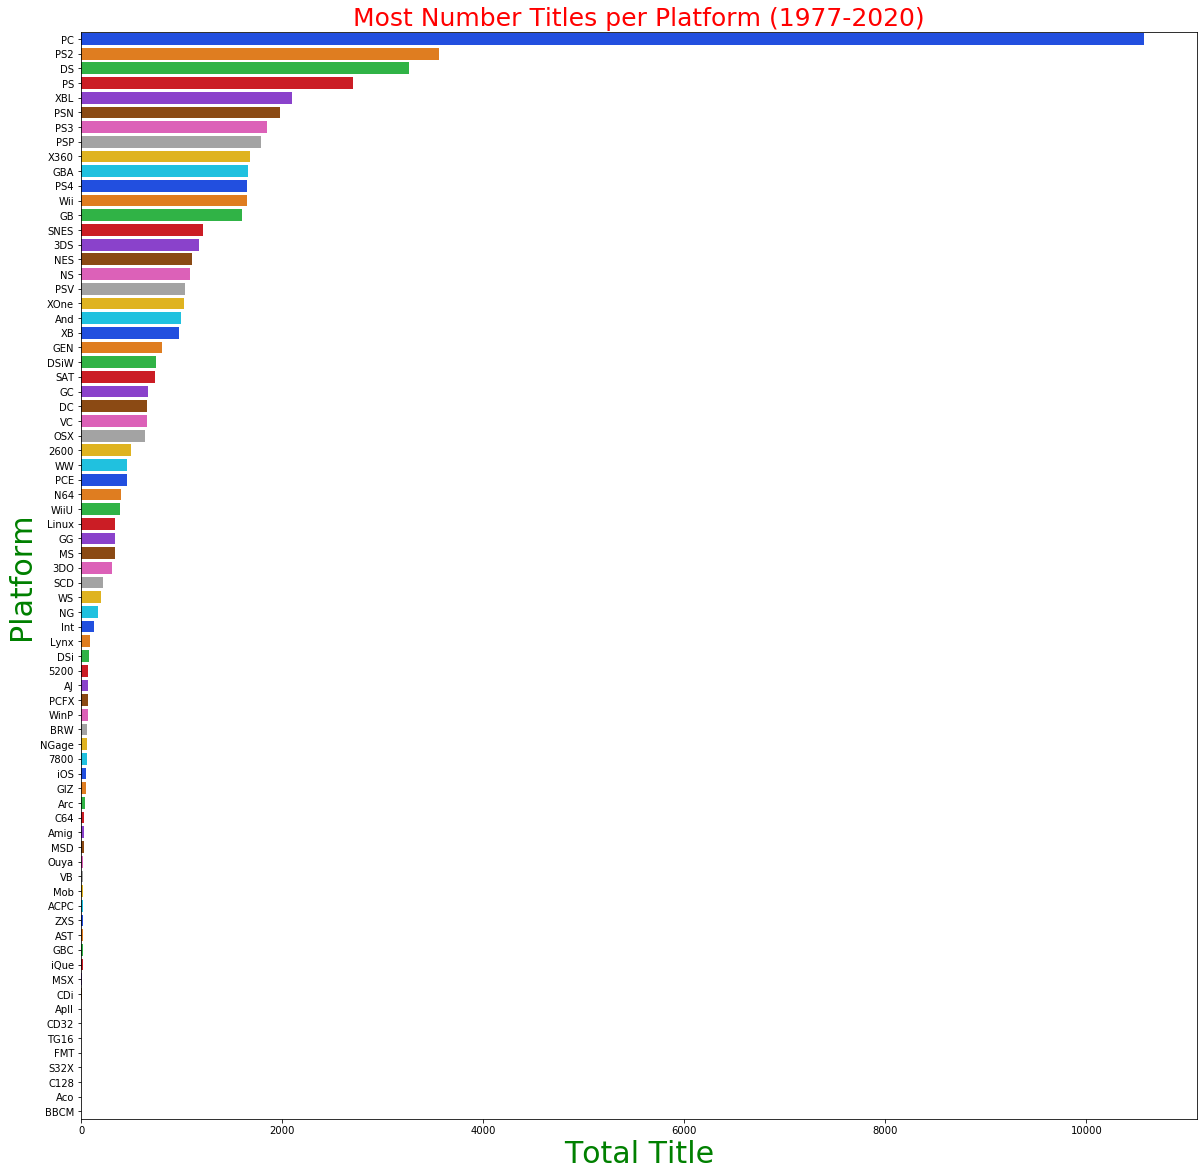

In [18]:
yearone = "(1977-2020)"
subplotsOne(games,yearone)

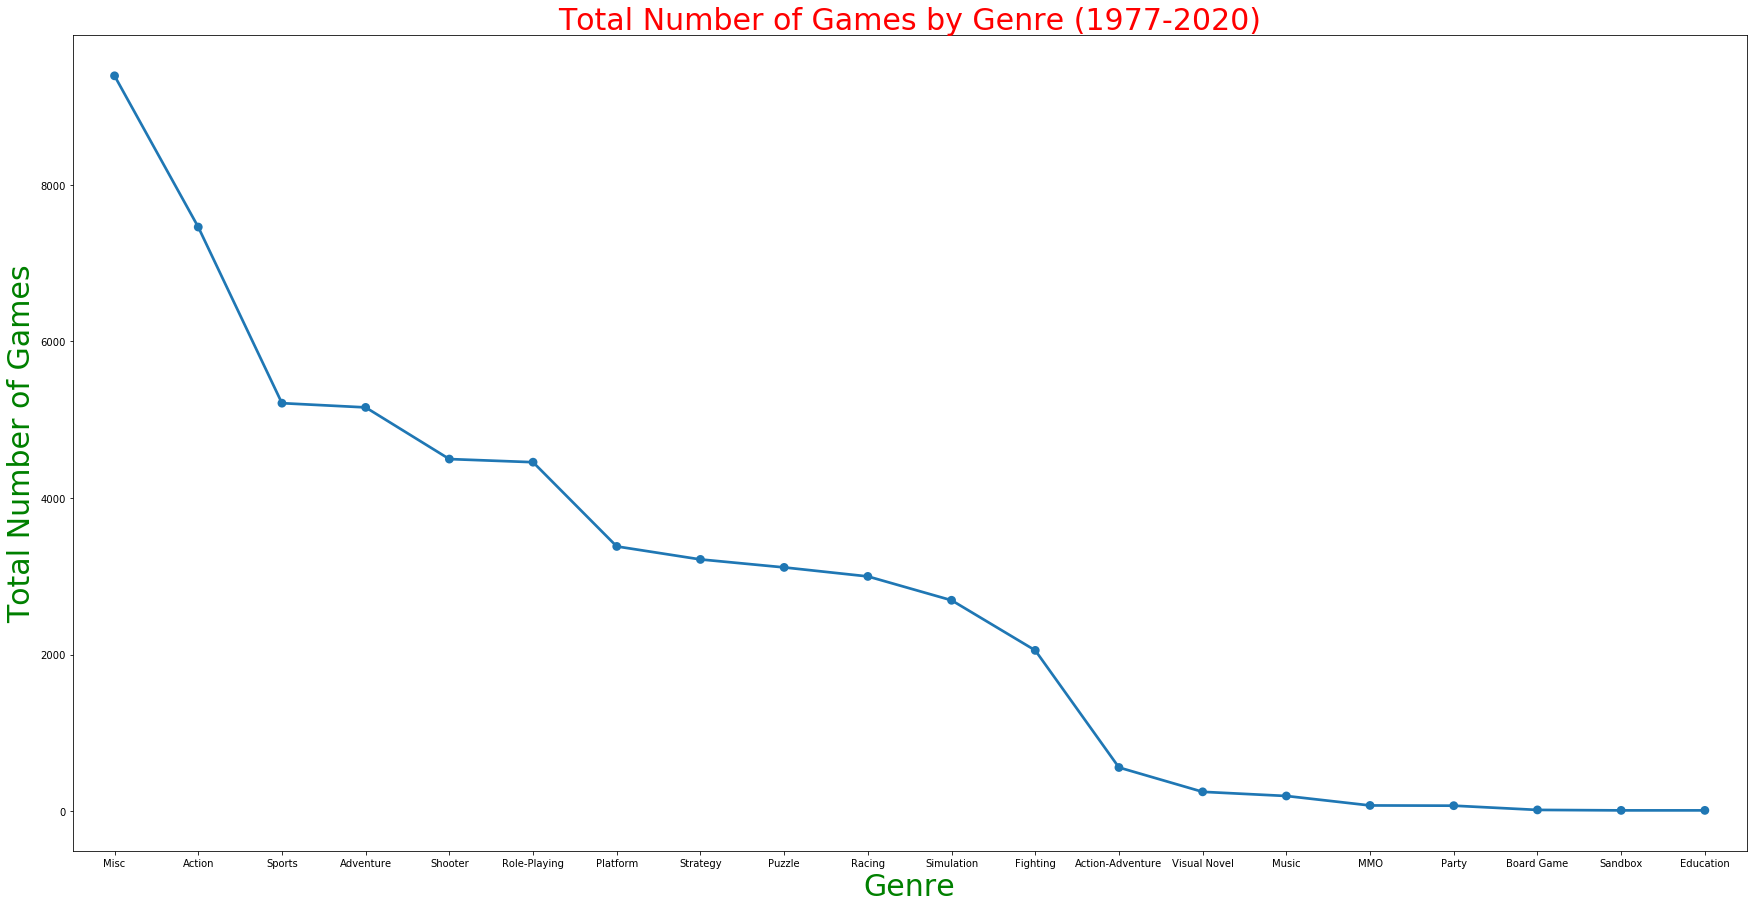

In [19]:

subplotsTwo (games, games_by_genre, yearone)


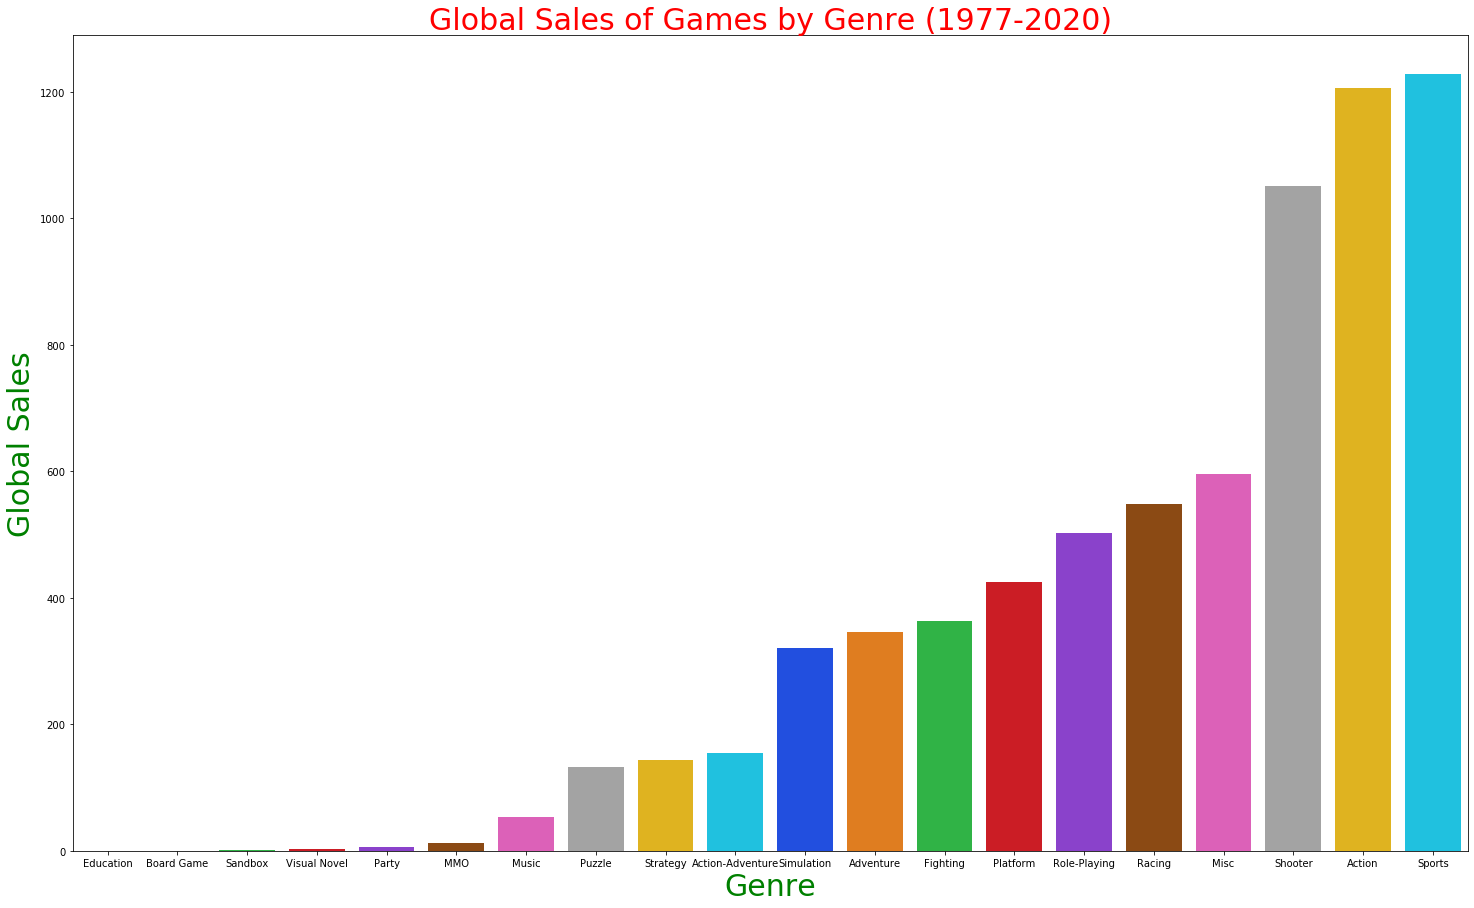

In [20]:
subplotsThree (games, yearone)


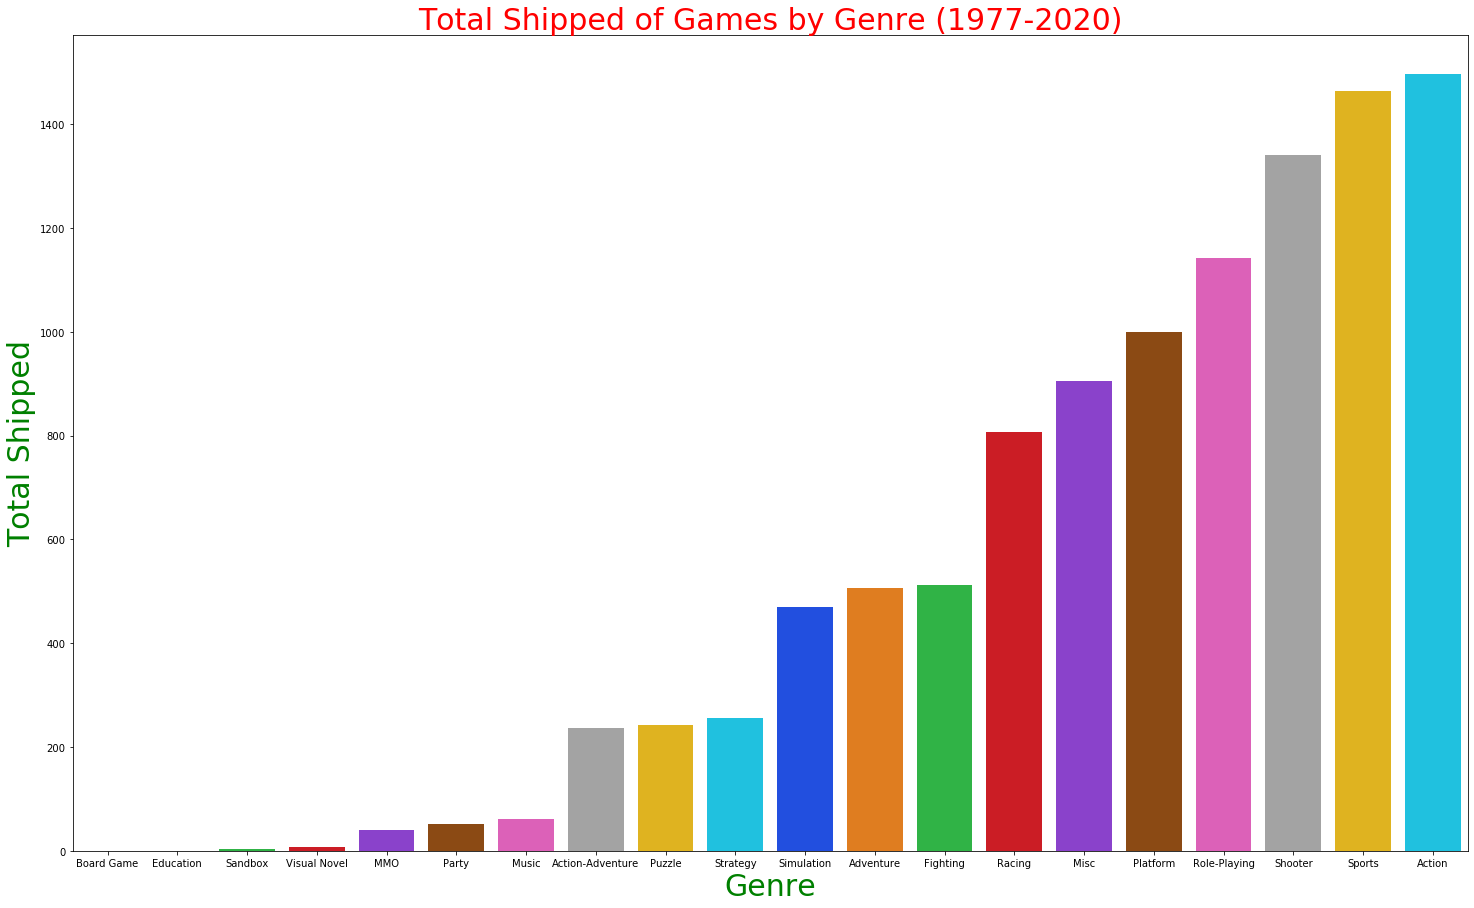

In [21]:
subplotsFour (games, yearone)


## as we see here 
<ul>
<li> The first polt -> We see most of the development of games in the computer.(very easy to develop and publish games on the PC.While on xbox you can develop as an indie developer, native development is only allowed for game publishers. Same is true for PlayStation 4.)
<li> The most developed games were Misc but the best-selling games were Action, Sport & Shooter
</ul>

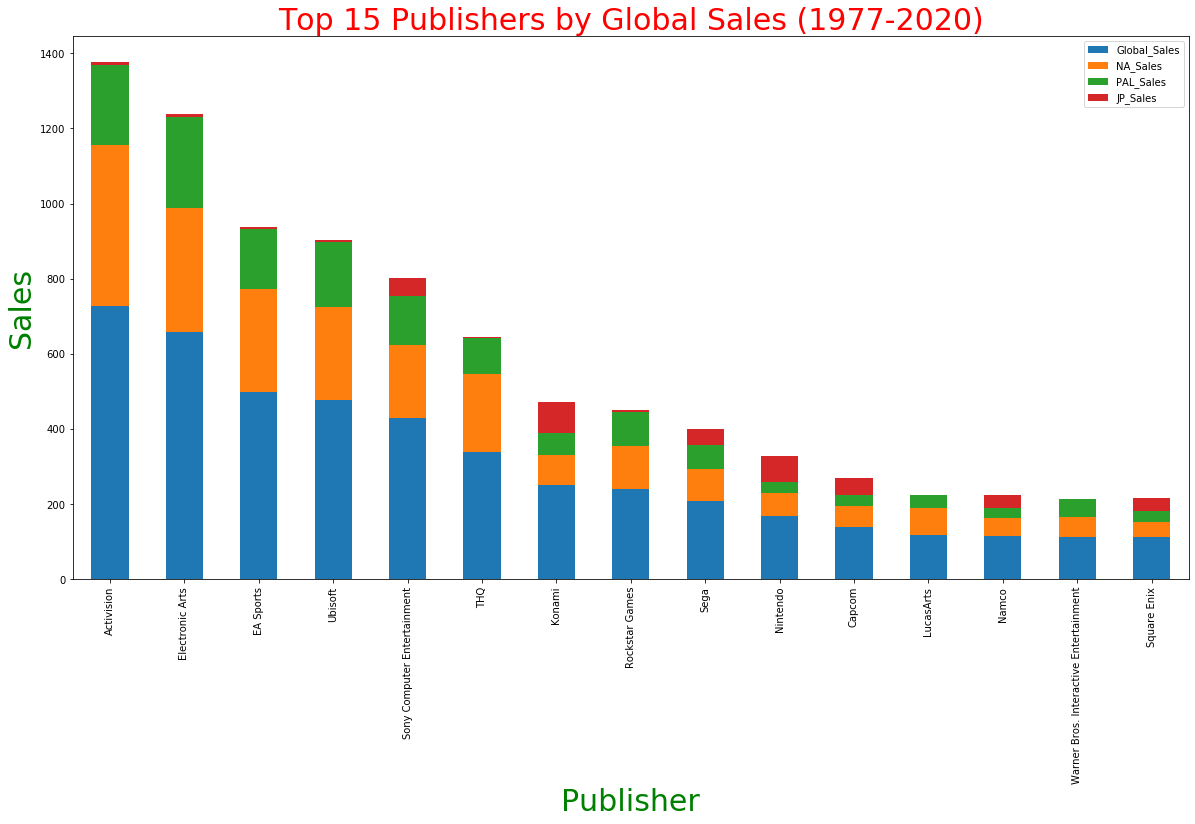

In [22]:
subplotsFive (games, yearone)


In [23]:
### see here the fist 

In [24]:
games_by_Publisher = games.loc[games.Publisher=="Activision"].sort_values(['Year'])
print(games_by_Publisher.shape)
games_by_Publisher.head()

(1519, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
4459,4460,Fishing Derby,fishing-derby,Sports,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.51,0.51,0.48,0.03,NaN,0.01,1980
7243,7244,Bridge,bridge,Misc,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.27,0.27,0.25,0.02,NaN,0.00,1980
6470,6471,Dragster,dragster,Racing,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.32,0.32,0.30,0.02,NaN,0.00,1980
45042,45043,Skiing,skiing,Sports,NaN,2600,Activision,Activision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
3076,3077,Boxing,boxing,Fighting,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.77,0.77,0.72,0.04,NaN,0.01,1980


In [25]:
games_by_Publisher1 = games_by_Publisher.groupby('Genre').agg({'Genre':len})
games_by_Publisher1.index.name = None
games_by_Publisher1 = games_by_Publisher1.sort_values(by='Genre',ascending=False)

Text(0, 0.5, 'Total Number of Games')

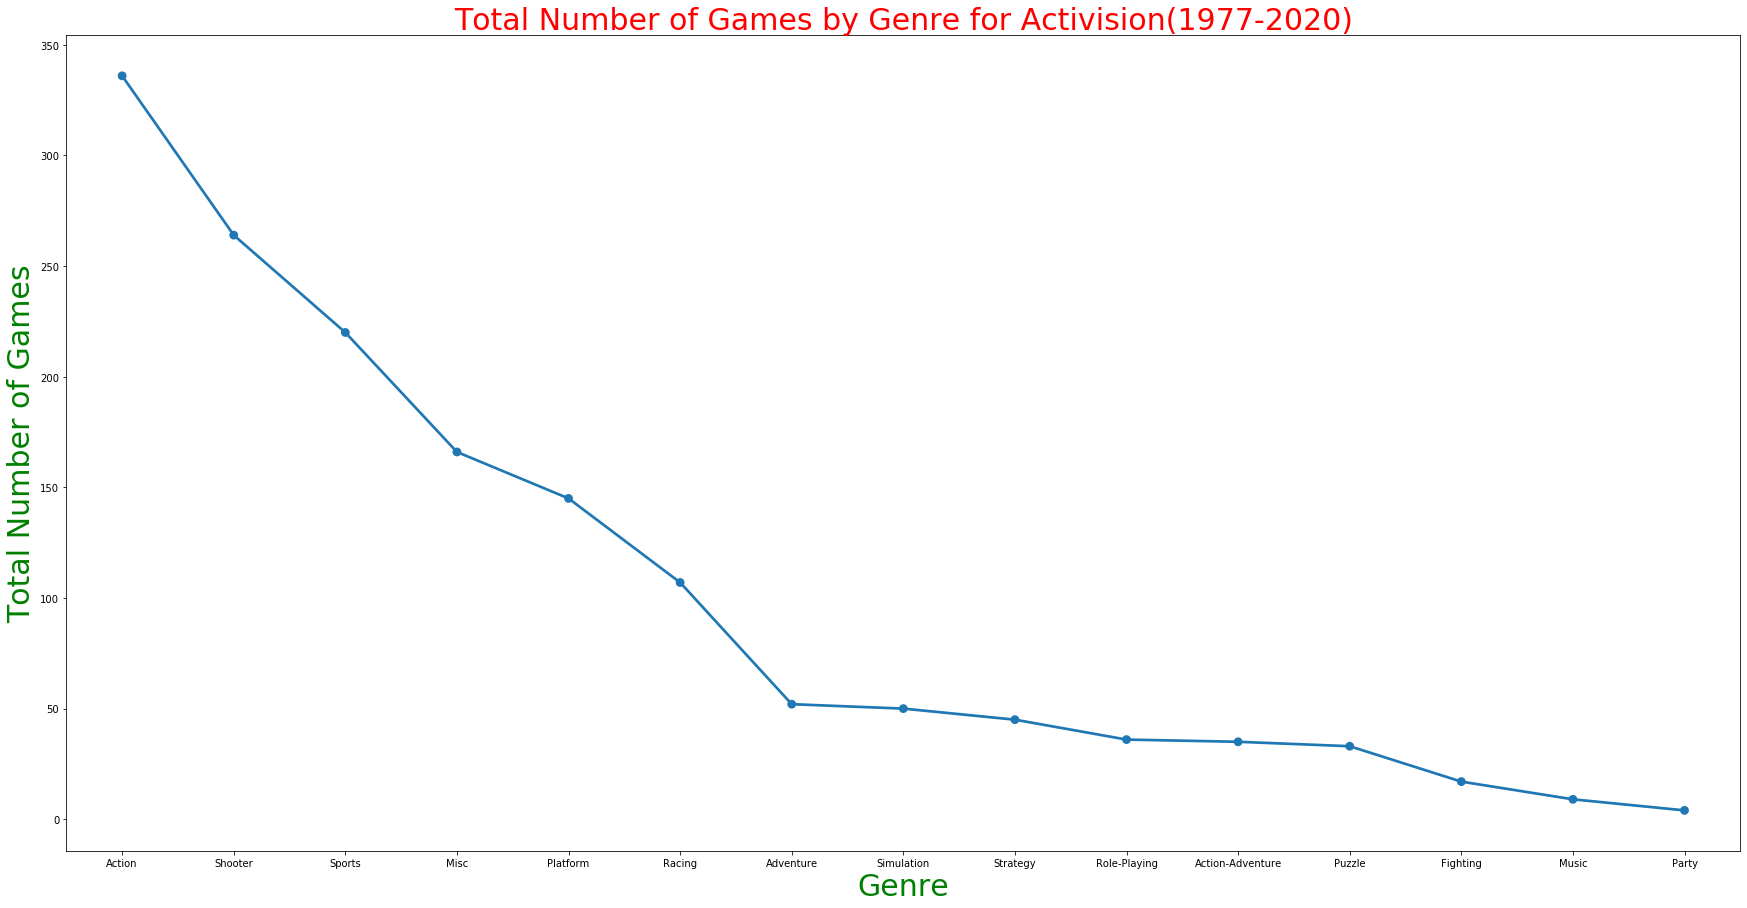

In [26]:
plt.subplots(figsize=(30,15))
ax = sns.pointplot(x=games_by_Publisher1.index, y=games_by_Publisher1.Genre)
ax.set_title('Total Number of Games by Genre for Activision(1977-2020)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Number of Games', color='green', size=30, alpha=1)

## As we see here Activision most of the development of games Action, Shooter and Sport

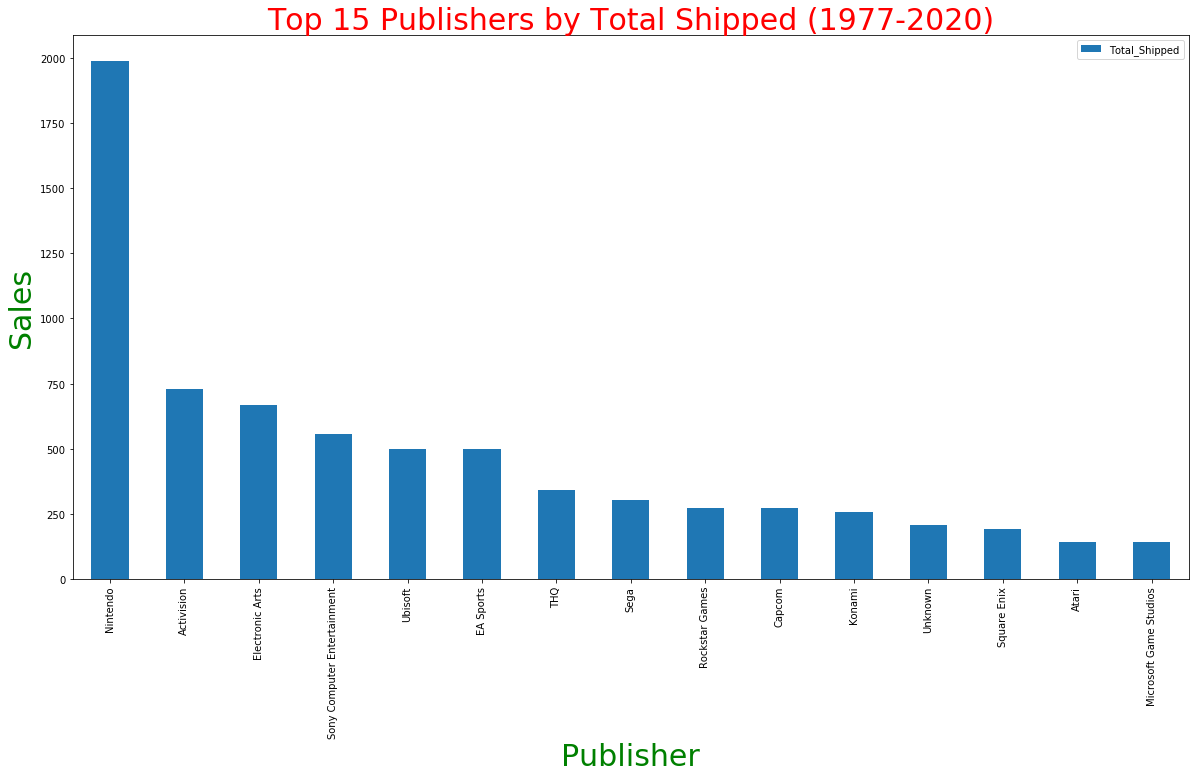

In [27]:
subplotsSix (games, yearone)

In [28]:
games_by_PublisherS = games.loc[games.Publisher=="Nintendo"].sort_values(['Year'])
print(games_by_PublisherS.shape)
games_by_PublisherS.head()

(1351, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
39568,39569,Nintengirls: College Girl & Friends,nintengirls-college-girl-amp-friends,Simulation,M,DS,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975
918,919,Mahjong,mahjong,Misc,NaN,NES,Nintendo,Nintendo,NaN,NaN,NaN,2.14,NaN,NaN,NaN,NaN,NaN,1983
41363,41364,Popeye no Eigo Asobi,popeye-no-eigo-asobi,Misc,NaN,NES,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983
1439,1440,F1 Race,f1-race,Racing,NaN,NES,Nintendo,Nintendo,NaN,NaN,NaN,1.52,NaN,NaN,NaN,NaN,NaN,1984
1551,1552,4 Nin uchi Mahjong,4-nin-uchi-mahjong,Misc,NaN,NES,Nintendo,Hudson Soft,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,NaN,1984


In [29]:
games_by_PublisherS1 = games_by_PublisherS.groupby('Genre').agg({'Genre':len})
games_by_PublisherS1.index.name = None
games_by_PublisherS1 = games_by_PublisherS1.sort_values(by='Genre',ascending=False)

Text(0, 0.5, 'Total Number of Games')

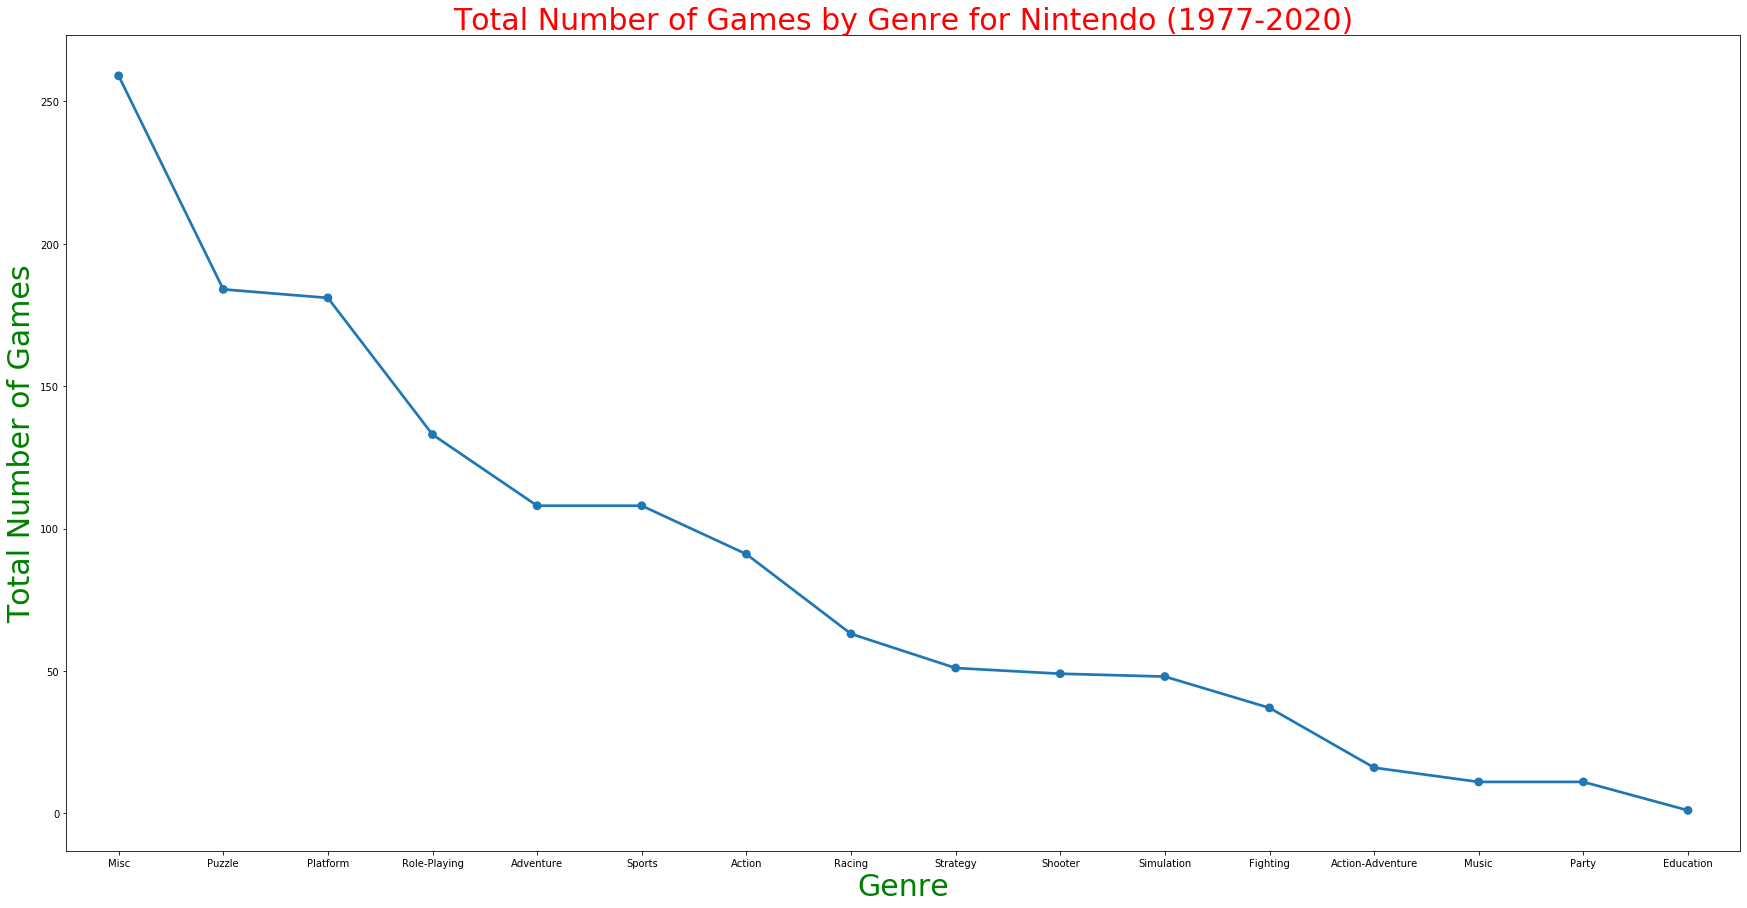

In [30]:
plt.subplots(figsize=(30,15))
ax = sns.pointplot(x=games_by_PublisherS1.index, y=games_by_PublisherS1.Genre)
ax.set_title('Total Number of Games by Genre for Nintendo (1977-2020)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Number of Games', color='green', size=30, alpha=1)

# Nintendo most of the development of games Misc, Pizzle and Platform

# Difference between Global_Sales and Total_Shipped, Global_Sales has NA_Sales PAL_Sales JP_Sales and Total_Shipped only all copice game 

Text(0, 0.5, 'Number of Titles')

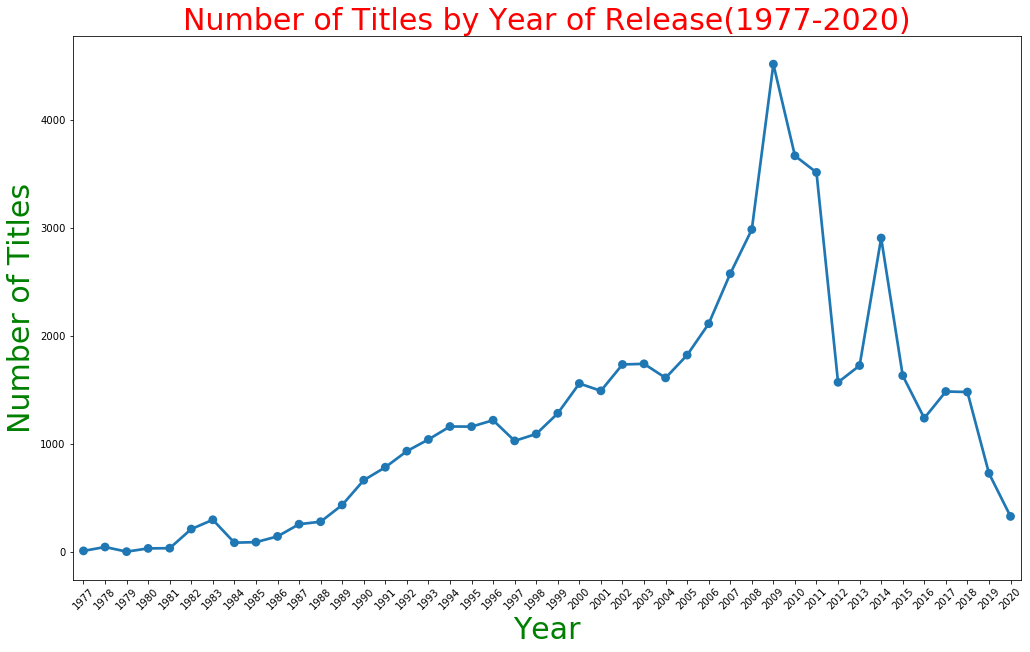

In [31]:
# Number of titles per year
titles_by_year = games.groupby(['Year']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(17,10))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.Name, alpha=1)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Titles by Year of Release(1977-2020)', size=30, color='red', alpha=1)
ax.set_xlabel('Year', size=30, color='green', alpha=1)
ax.set_ylabel('Number of Titles', size=30, color='green', alpha=1)

In [32]:
titles_by_year

,Name
Year,
1977,12.0
1978,48.0
1979,5.0
1980,35.0
1981,37.0
1982,214.0
1983,300.0
1984,88.0
1985,93.0


Text(0, 0.5, 'Number of Total Shipped')

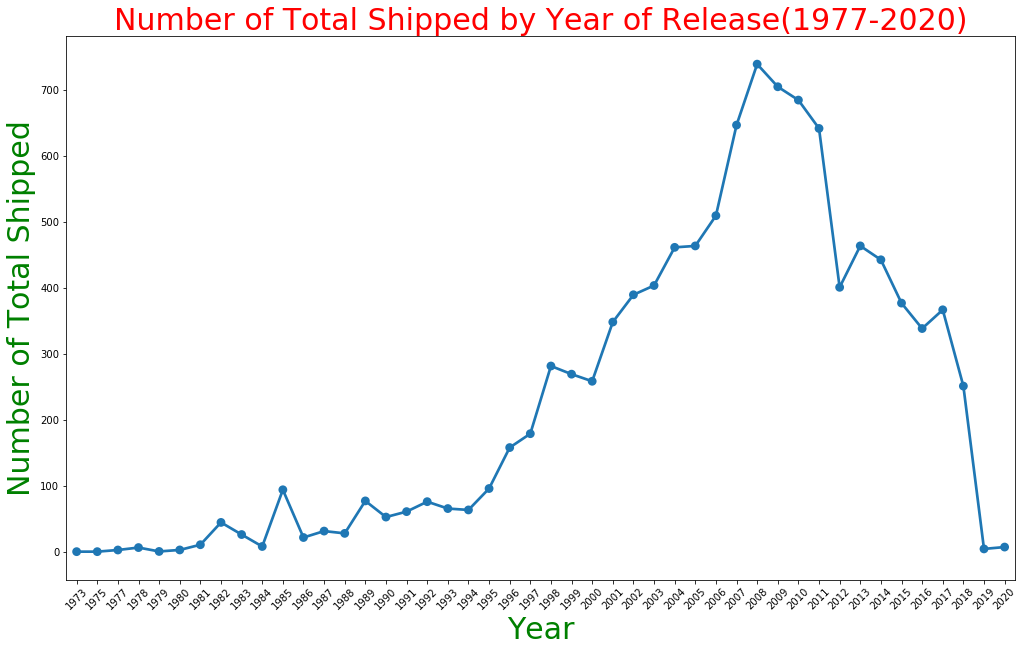

In [33]:
# Number of titles per year

titles_by_year1 = games.groupby(['Year']).agg({'Total_Shipped':np.sum})
plt.subplots(figsize=(17,10))
ax = sns.pointplot(x=titles_by_year1.index, y=titles_by_year1.Total_Shipped, alpha=1)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Total Shipped by Year of Release(1977-2020)', size=30, color='red', alpha=1)
ax.set_xlabel('Year', size=30, color='green', alpha=1)
ax.set_ylabel('Number of Total Shipped', size=30, color='green', alpha=1)

In [34]:
titles_by_year1

,Total_Shipped
Year,
1973,0.00
1975,0.00
1977,2.50
1978,6.19
1979,0.31
1980,2.58
1981,10.49
1982,44.29
1983,25.92


## The best sales year for games was in 2009 and was 704.25 million copies and 4516 games

In [35]:
games_2009 = games.loc[games.Year==2009].sort_values(['Year'])
print(games_2009.shape)
games_2009.head()

(4516, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009
33762,33763,Hot Shots Golf: Open Tee 2,hot-shots-golf-open-tee-2,Sports,E,PSN,Sony Computer Entertainment,Clap Hanz,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
33781,33782,Hotel Danger,hotel-danger,Puzzle,NaN,XBL,Microsoft,North West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
33782,33783,Hotel Giant 2,hotel-giant-2,Strategy,NaN,DS,Unknown,Creative Patterns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
33842,33843,Hula Wii: Motto Jouzu no Fura o Odorou!!,hula-wii-motto-jouzu-no-fura-o-odorou,Sports,NaN,Wii,Milestone,MileStone Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


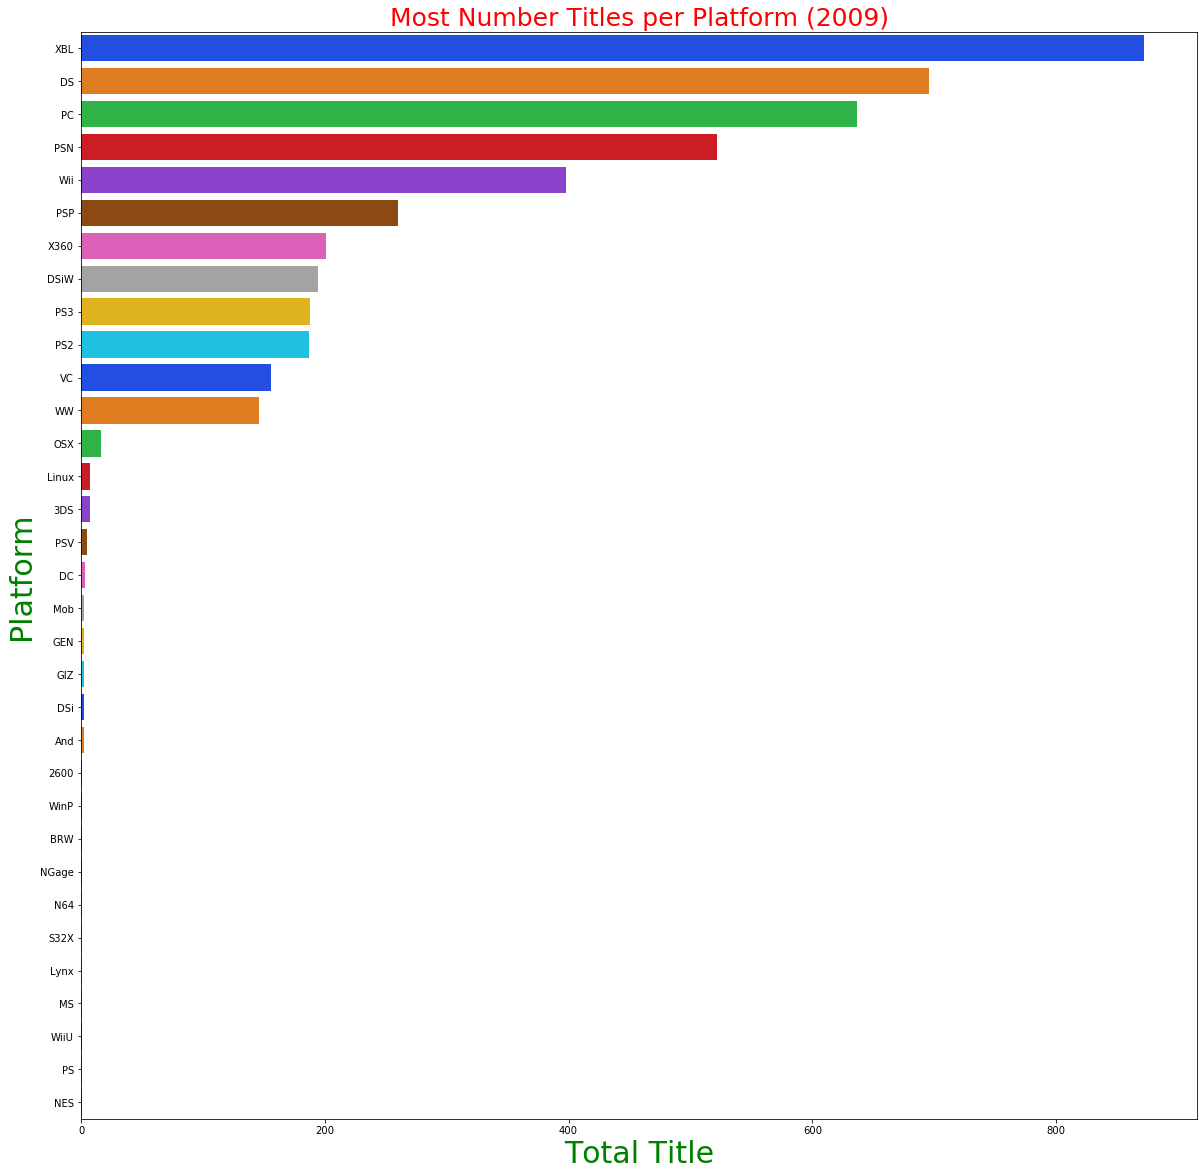

In [36]:
year2 = "(2009)"
subplotsOne (games_2009, year2)

In [37]:
games_by_genre_2009 = games_2009.groupby('Genre').agg({'Genre':len})
games_by_genre_2009.index.name = None
games_by_genre_2009 = games_by_genre_2009.sort_values(by='Genre',ascending=False)


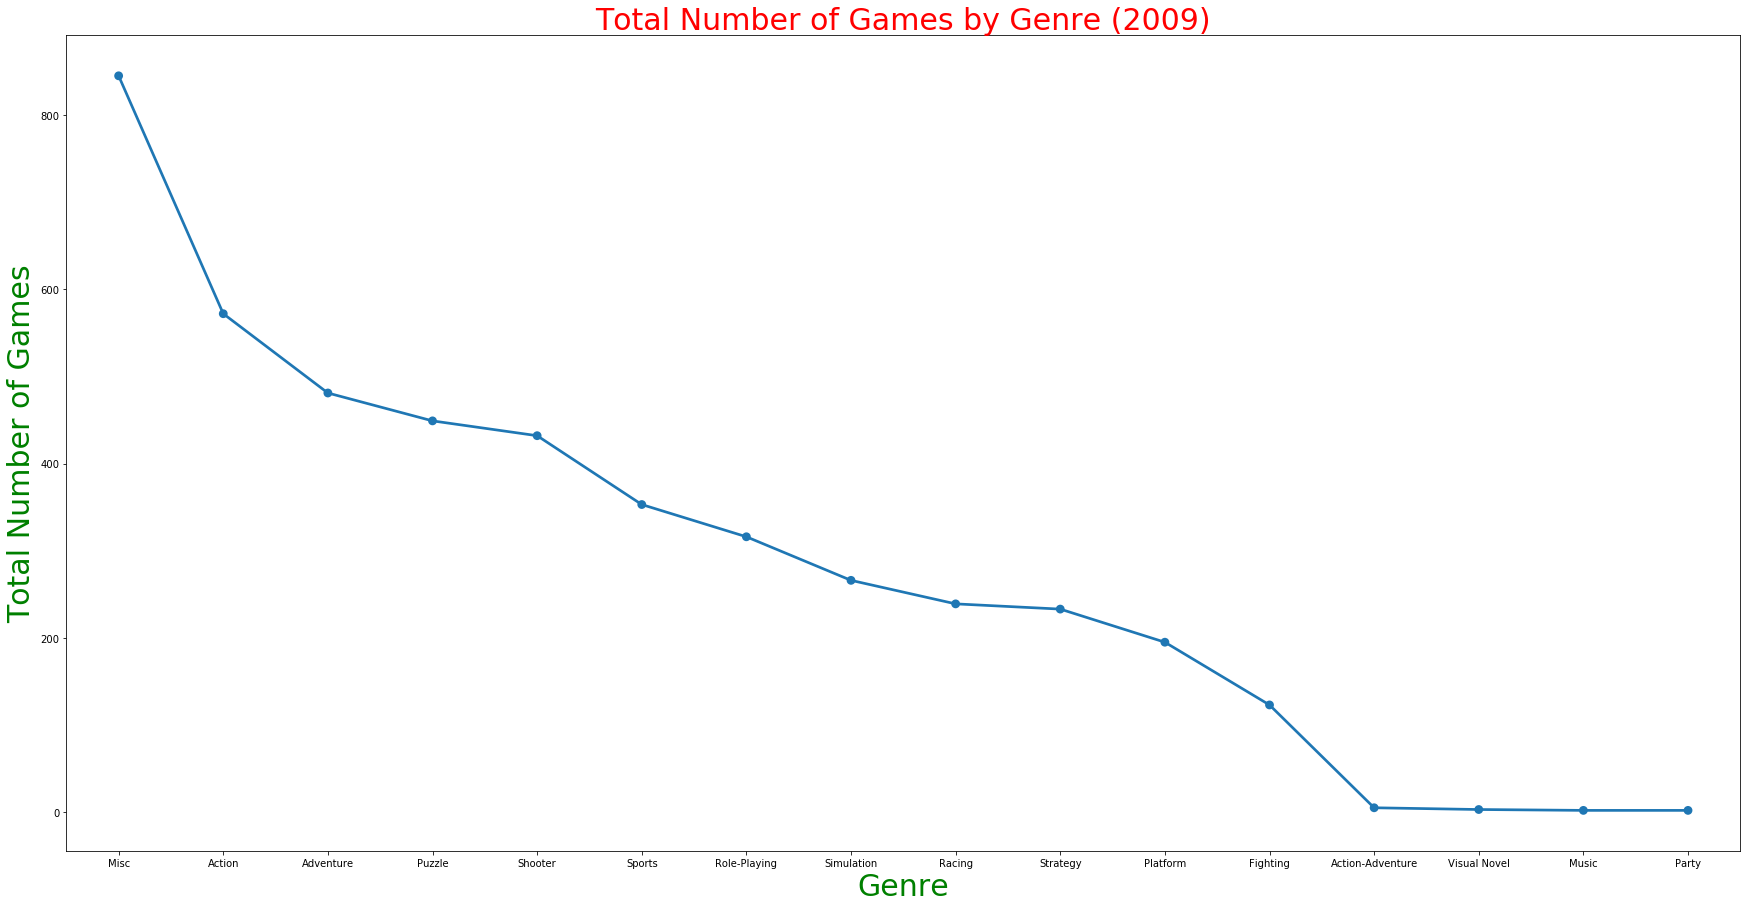

In [38]:
subplotsTwo (games_2009, games_by_genre_2009, year2)


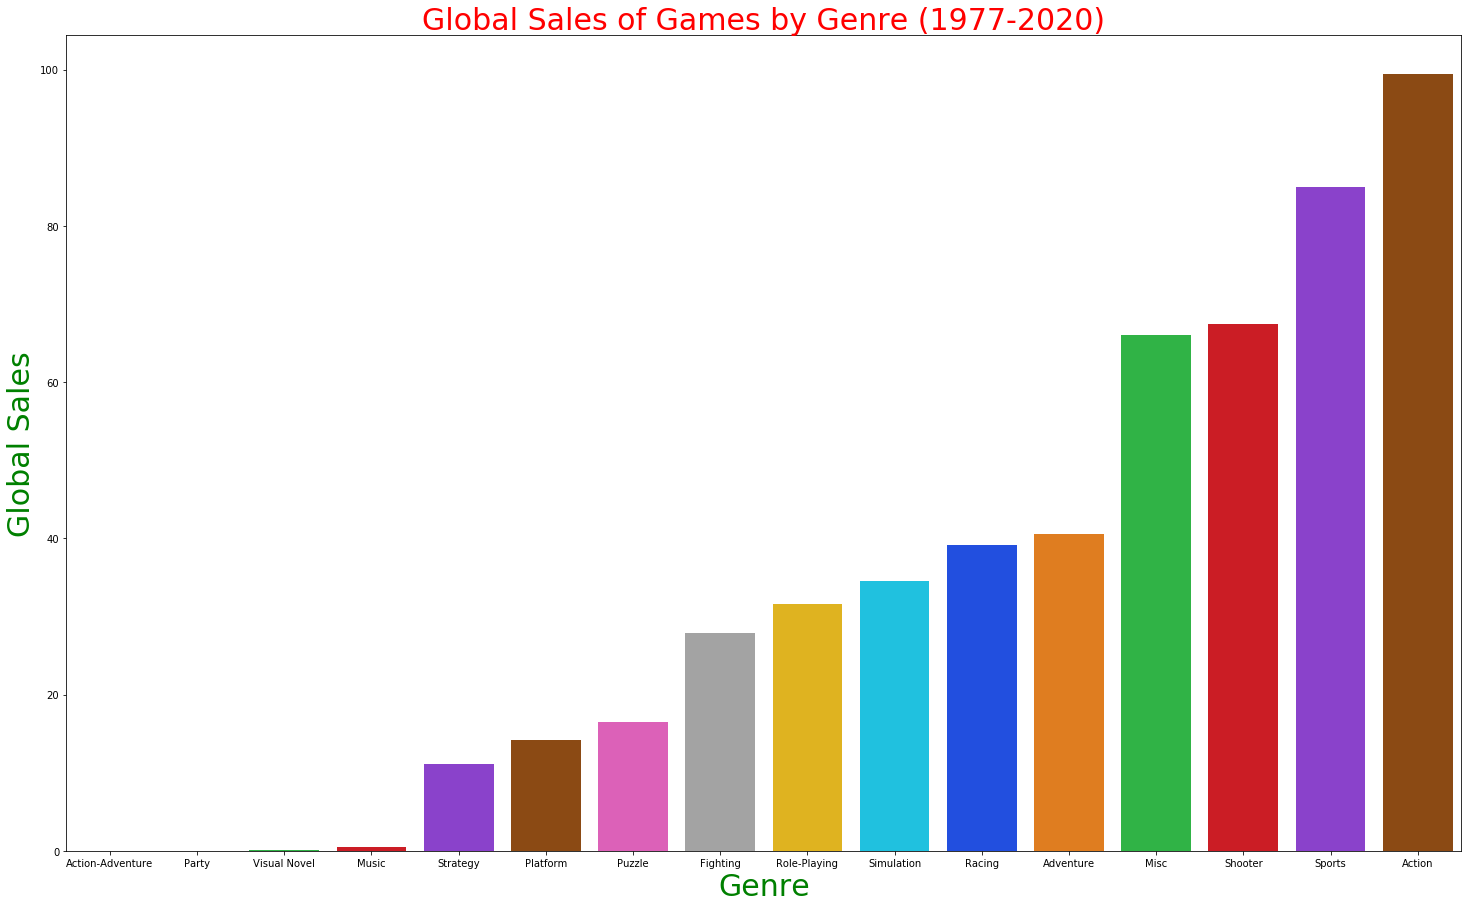

In [39]:
subplotsThree (games_2009, year2)


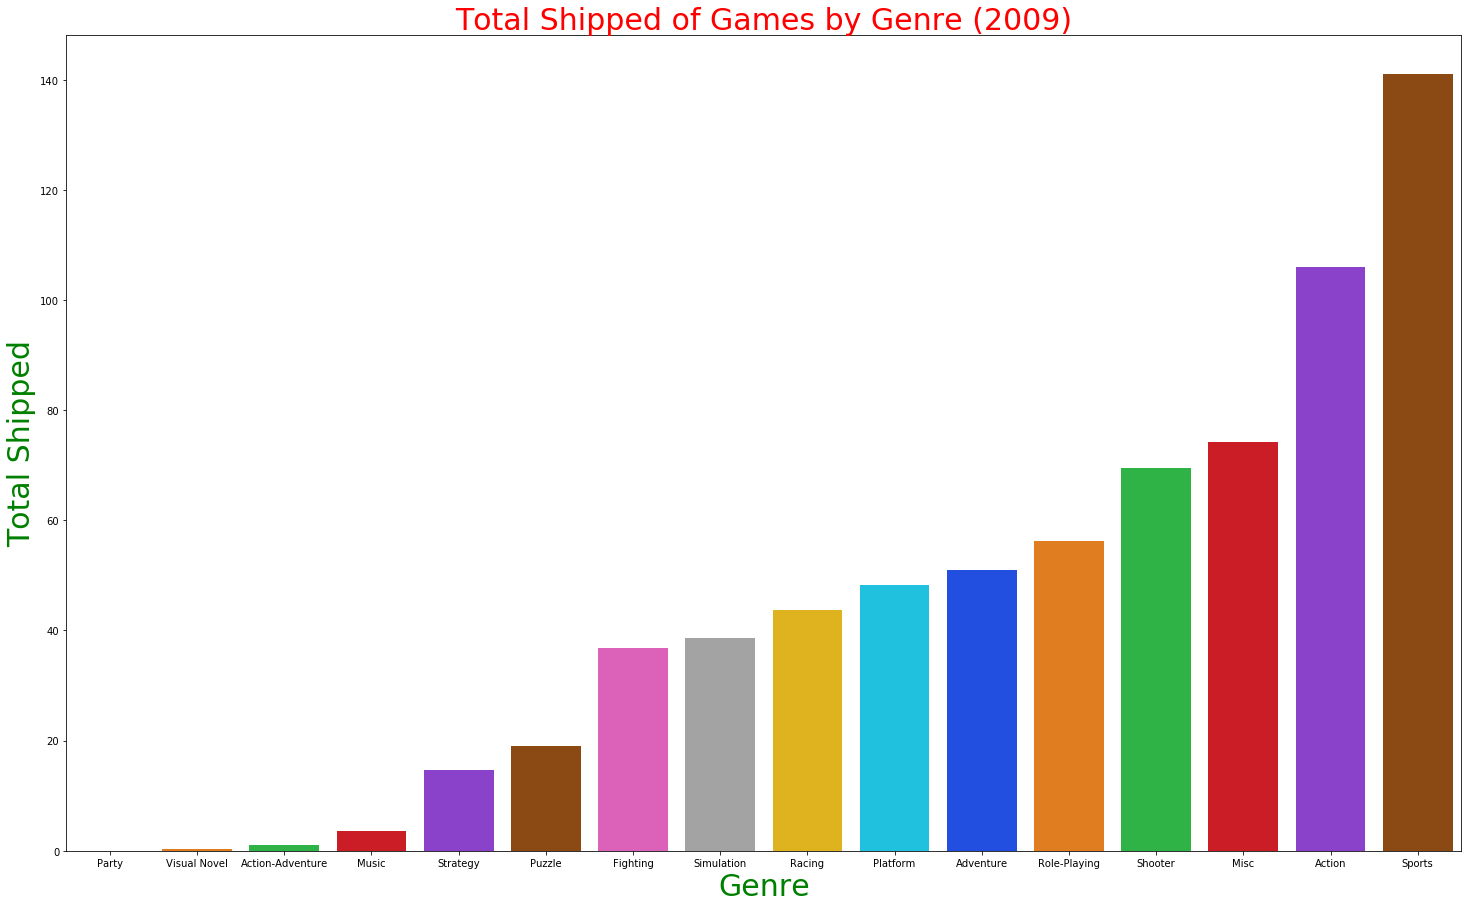

In [40]:
subplotsFour (games_2009, year2)


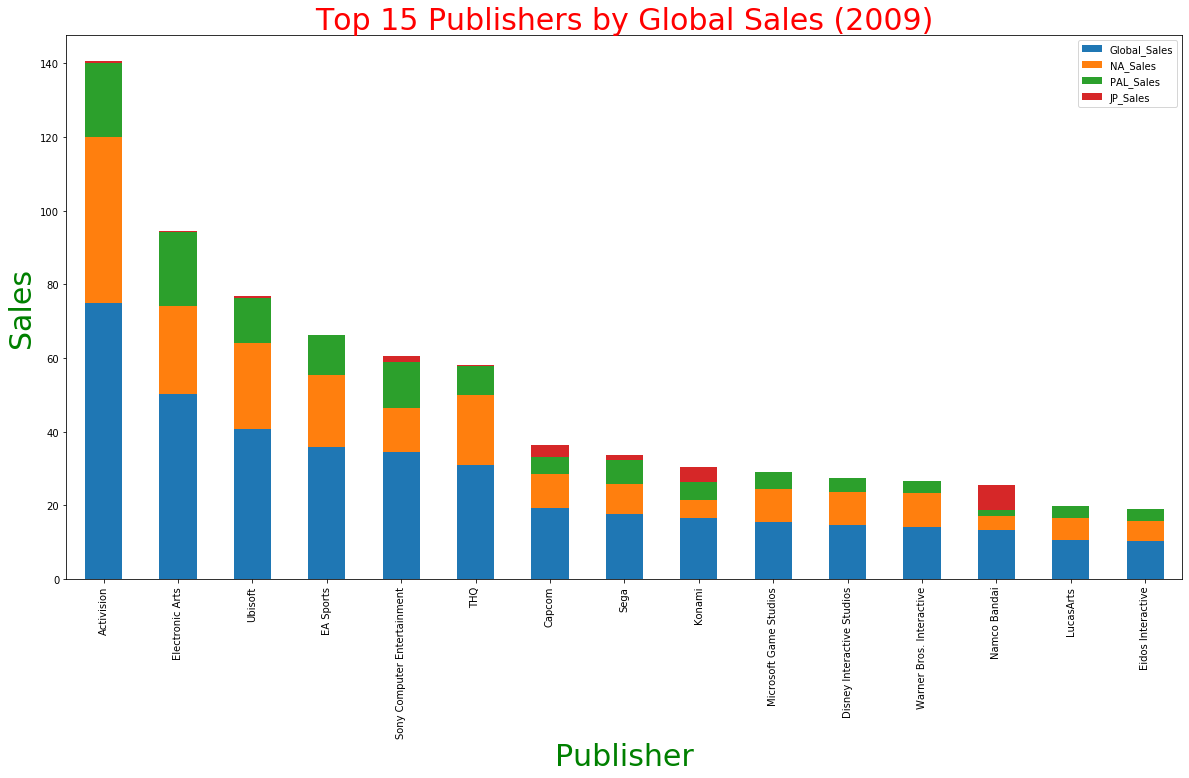

In [41]:
subplotsFive (games_2009, year2)


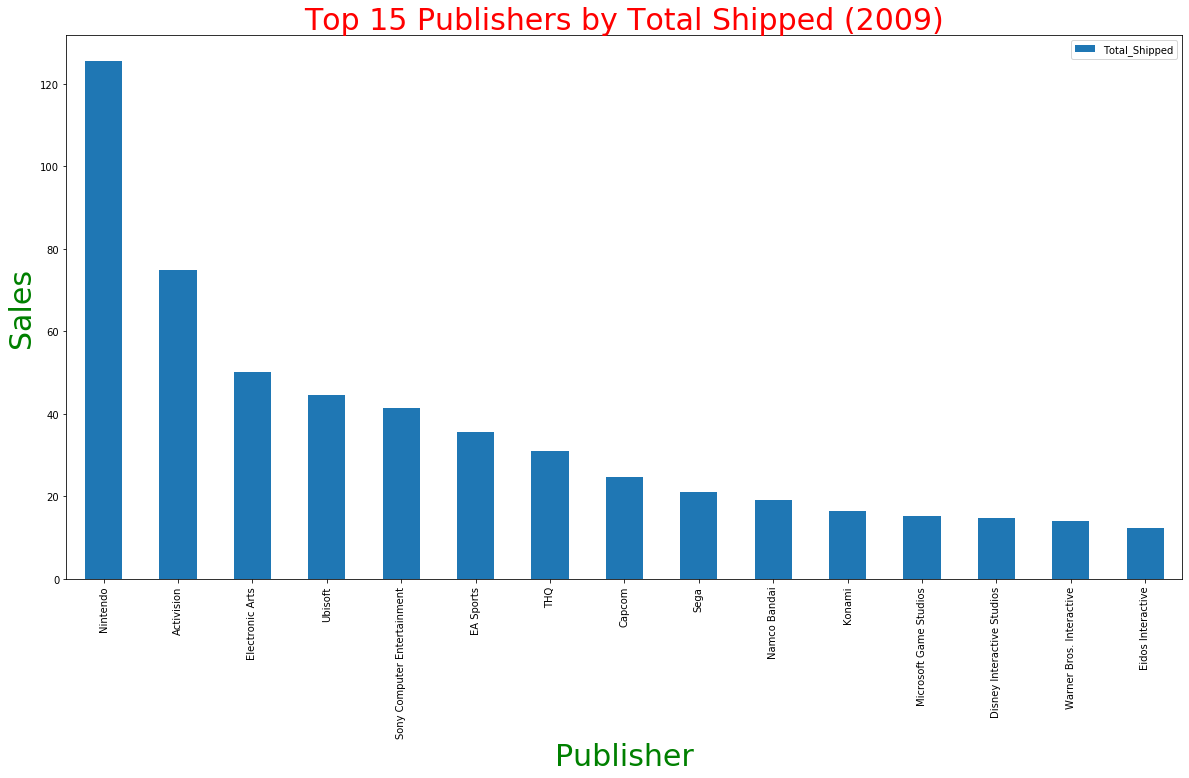

In [42]:
subplotsSix (games_2009, year2)


## 5-Deployment
### Final Thoughts:
In this analysis we explored problem from different prospectives, yet leaving so much to uncover. We can summarize our findings as follows:

 We discovered that most of the sales of games are from the category of Action Sports and correction
In recent years one of the reasons for the lack of games is that they have started developing games for a long time and more than a year to develop them.
I like the data to be complete until we see the reasons why most of the players what they like and also how much it takes to develop games of effort.